In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler, Binarizer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score, train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, roc_auc_score, classification_report, confusion_matrix

### Análise exploratória dos dados

In [ ]:
df = pd.read_excel('Dados_trabalho_final.xlsx', sheet_name='Sheet1')

In [ ]:
print("Informações do dataset:")
print(df.info())

Informações do dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11807 entries, 0 to 11806
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   ANO_MATRICULA          11807 non-null  int64 
 1   PERIODO_MATRICULA      11807 non-null  int64 
 2   ANO_PROJETADO          11807 non-null  int64 
 3   PERIODO_PROJETADO      11807 non-null  int64 
 4   SIGLA                  11807 non-null  object
 5   CADASTRO               11807 non-null  object
 6   ALUNO_NOVO             11807 non-null  int64 
 7   ANO_INGRESSO           11807 non-null  int64 
 8   DT_AGENDAMENTO         11807 non-null  int64 
 9   DT_ORIENTACAO          11807 non-null  int64 
 10  DT_SOLICITACAO         11807 non-null  int64 
 11  DT_MATRICULA           11807 non-null  int64 
 12  DEBITO                 11807 non-null  int64 
 13  SEMESTRE_ALUNO         11807 non-null  int64 
 14  NRO_DISC_MATRICULADAS  11807 non-null  int64 


In [ ]:
print("Dataset:")
df.head()

Dataset:


,ANO_MATRICULA,PERIODO_MATRICULA,ANO_PROJETADO,PERIODO_PROJETADO,SIGLA,CADASTRO,ALUNO_NOVO,ANO_INGRESSO,DT_AGENDAMENTO,DT_ORIENTACAO,...,PERC_CH_CURSADA,FALTAS_HA,DISC_REPROVADAS,NRO_NEGOCIACAO,MEDIA_10,FINANCIAMENTO,TIPO_ESCOLA,PRESENCIAL,TIPO_MATRICULA,POSSIVEL_FORMANDO
0,2022,4,2023,2,CURSO_1,88c3e3ae5870d11d5bee8b9deb564ac4,0,2021,0,0,...,"28,89",29,0,0,"5,55625",0,NaN,0,matricula-parcelamento-por-disciplina,0
1,2022,4,2023,2,CURSO_1,52b2594f548dff5025debef41cf7da40,0,2022,0,0,...,"95,56",22,0,0,"6,1375",0,Pública Regular,0,matricula-parcelamento-por-disciplina,0
2,2022,4,2023,2,CURSO_1,9811349d222352d221d6144a347a6cfa,1,2022,1,1,...,"54,44",16,0,0,"6,37333",0,Pública Regular,1,matricula-parcelamento-por-disciplina,0
3,2022,4,2023,2,CURSO_1,d5bbaa00aa1abddc1e13e74db6b4394c,0,2022,0,0,...,100,0,0,2,"5,58409",0,Pública Regular,0,credito,1
4,2022,4,2023,2,CURSO_1,8219caefad6241782c786748db557516,0,2022,1,1,...,"48,89",4,0,0,"4,56551",0,Pública Regular,1,matricula-parcelamento-por-disciplina,0


In [ ]:
print(f"Quantidade total de amostras:\n\t{df.shape[0]}")

Quantidade total de amostras:
	11807


In [ ]:
missing_values = df.isnull().sum()
print("Valores ausentes por coluna:")
print(missing_values[missing_values > 0])

Valores ausentes por coluna:
MEDIA_10         12
TIPO_ESCOLA    1057
dtype: int64


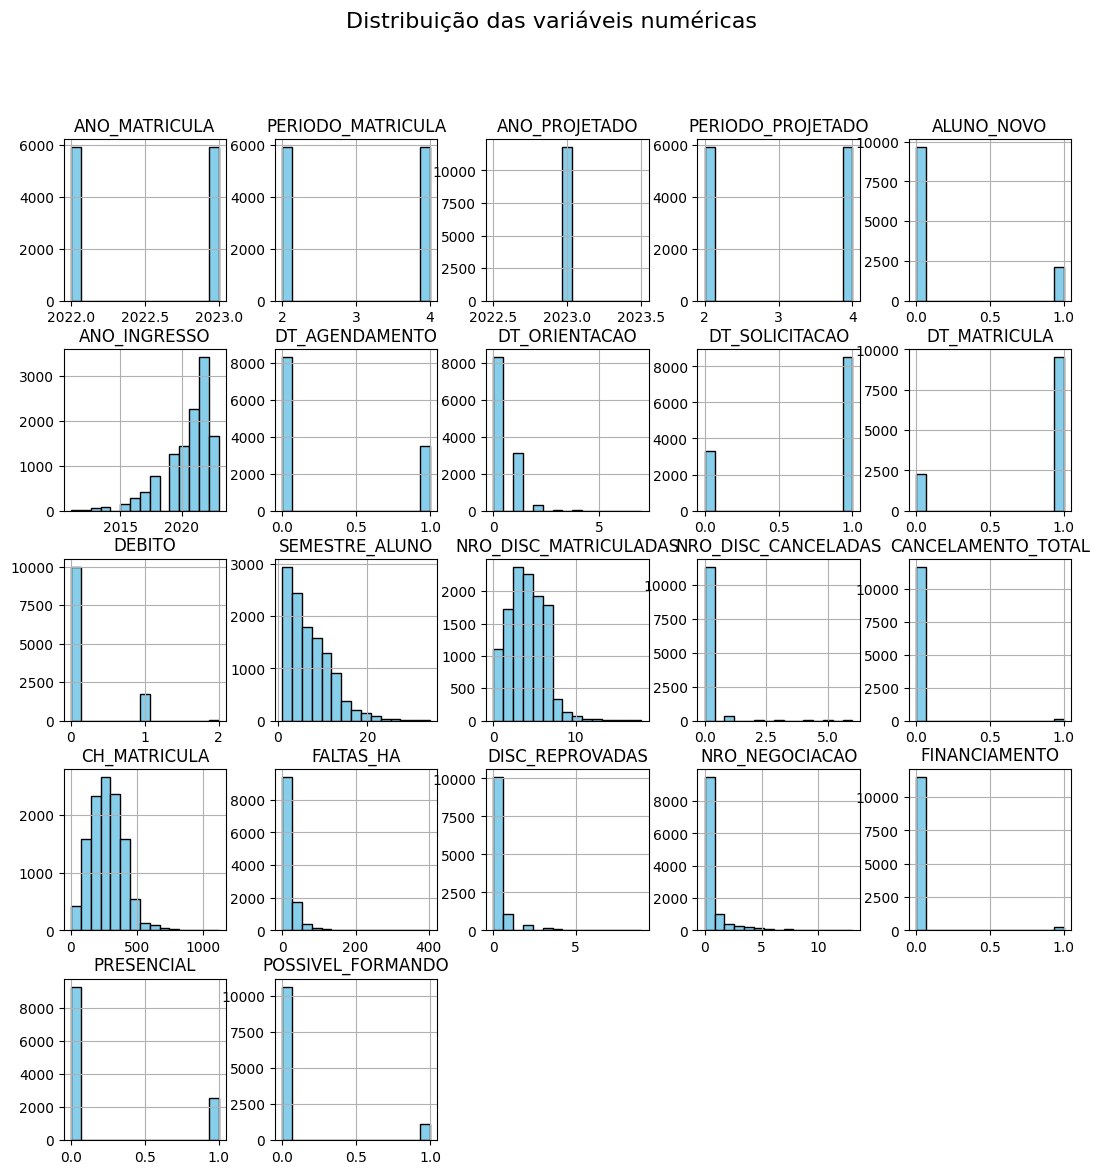

In [ ]:
numerical_cols = df.select_dtypes(include=np.number).columns
df[numerical_cols].hist(bins=15, figsize=(13, 13), color='skyblue', edgecolor='black')
plt.suptitle("Distribuição das variáveis numéricas", fontsize=16)
plt.show()

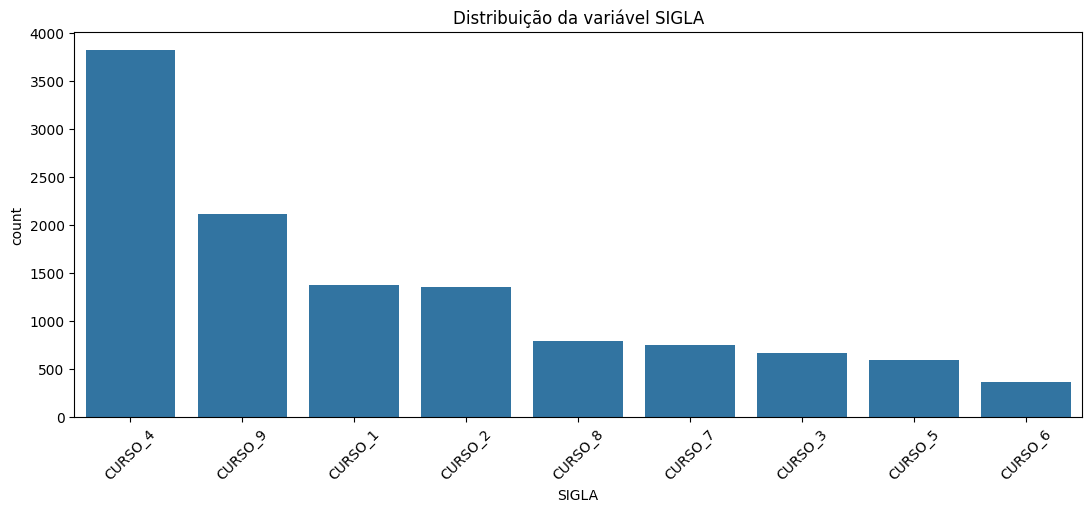

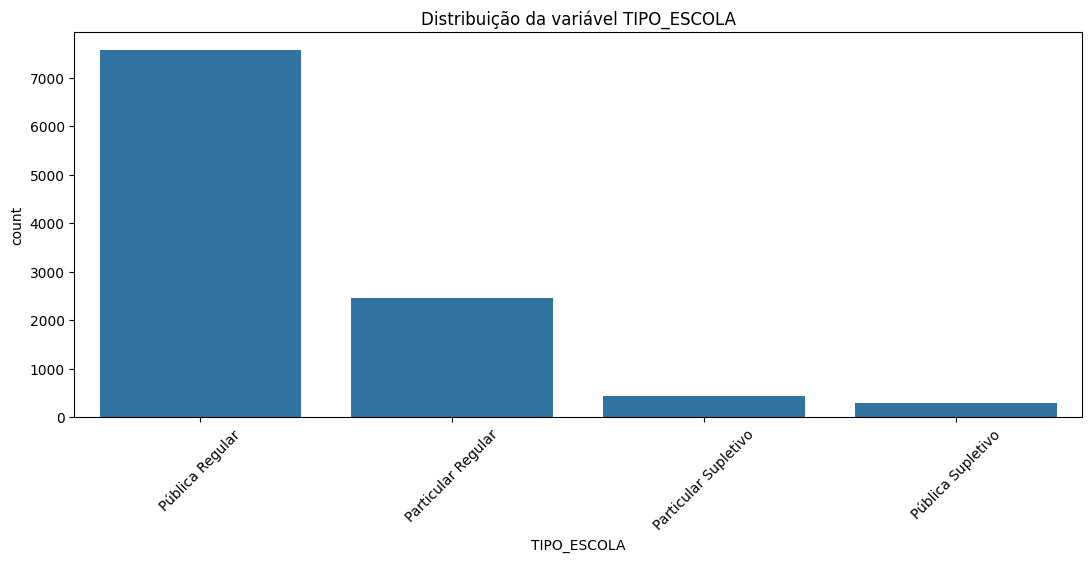

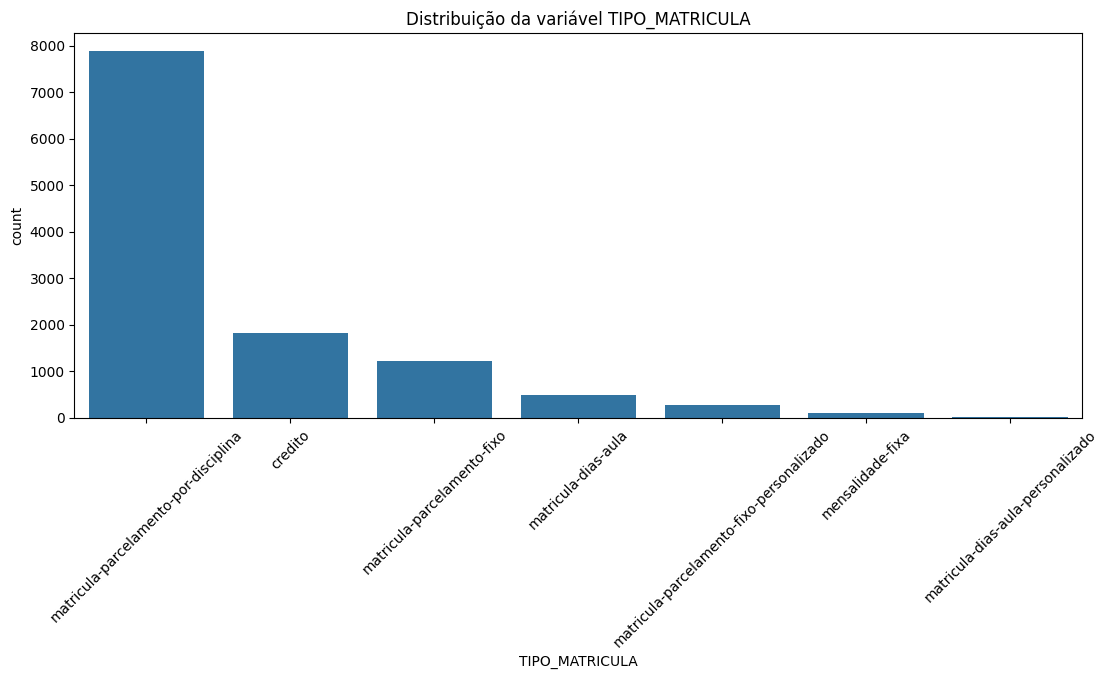

In [ ]:
categorical_cols = ["SIGLA", "TIPO_ESCOLA", "TIPO_MATRICULA"]
for col in categorical_cols:
    plt.figure(figsize=(13, 5))
    sns.countplot(x=col, data=df, order=df[col].value_counts().index)
    plt.title(f"Distribuição da variável {col}")
    plt.xticks(rotation=45)
    plt.show()

In [ ]:
print("Distribuição da variável CANCELAMENTO_TOTAL: ")
df['CANCELAMENTO_TOTAL'].value_counts()

Distribuição da variável CANCELAMENTO_TOTAL: 


,count
CANCELAMENTO_TOTAL,
0,11717
1,90


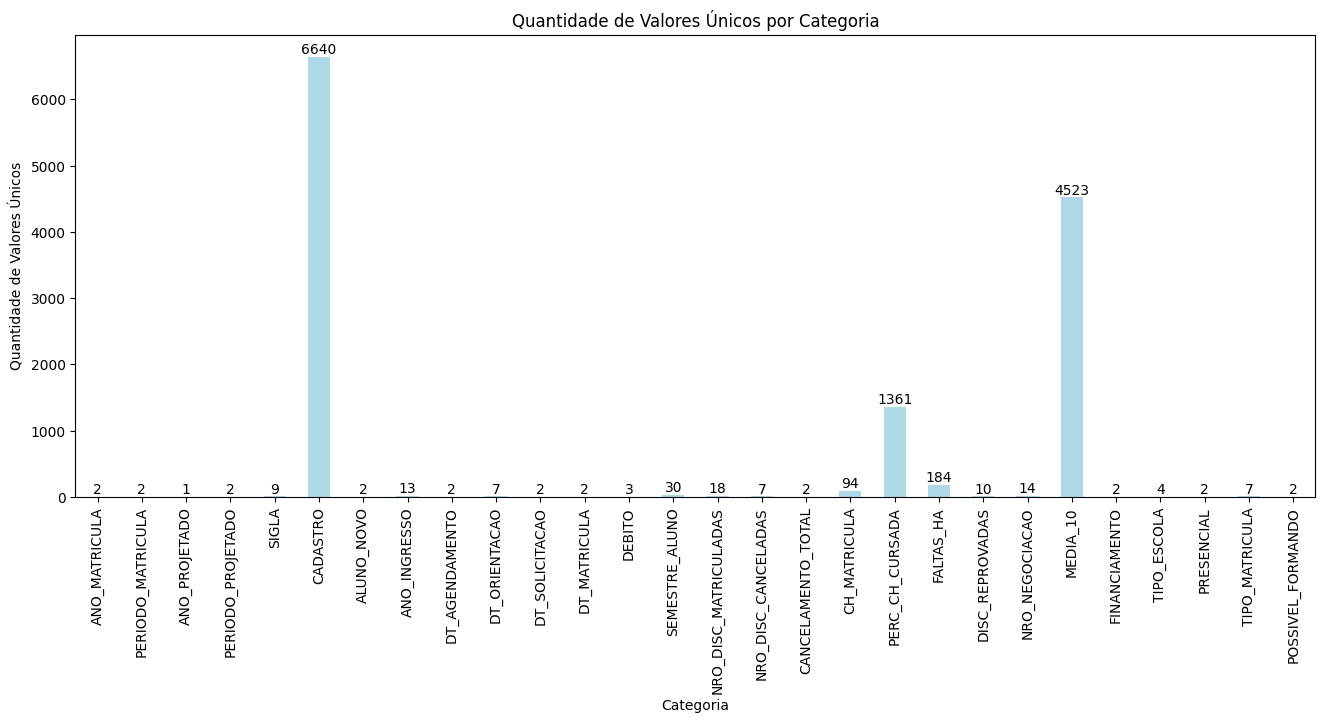

In [ ]:
# Remover todas as linhas com valores nulos
df_copy = df.dropna()

nunique = df_copy.nunique()

plt.figure(figsize=(16, 6))
ax = nunique.plot(kind='bar', color='lightblue')

plt.title('Quantidade de Valores Únicos por Categoria')
plt.xlabel('Categoria')
plt.ylabel('Quantidade de Valores Únicos')

for i, v in enumerate(nunique):
    ax.text(i, v + 0.1, str(v), ha='center', va='bottom')

plt.show()

In [ ]:
for coluna, tipo in df.dtypes.items():
  valores_unicos = df[coluna].unique()
  _tipo = "texto" if tipo == "object"  else "inteiro" if tipo == "int64" else  "float"

  print(f"{coluna}, valor do tipo {_tipo} com {valores_unicos.shape[0]} variações de valores")

  print(f"Coluna: {coluna.ljust(25, ' ')} Tipo de Dado: {_tipo.ljust(25, ' ')} Valores Únicos: {valores_unicos.shape[0]}\n")

  if len(valores_unicos) > 10:
      print("\t" + "\n\t".join(map(str, valores_unicos[:5])))
      print("\t[...]")
      print("\t" + "\n\t".join(map(str, valores_unicos[-5:])))
  else:
      print("\t" + "\n\t".join(map(str, valores_unicos)))

  print('\n' + '-' * 100 + '\n')

ANO_MATRICULA, valor do tipo inteiro com 2 variações de valores
Coluna: ANO_MATRICULA             Tipo de Dado: inteiro                   Valores Únicos: 2

	2022
	2023

----------------------------------------------------------------------------------------------------

PERIODO_MATRICULA, valor do tipo inteiro com 2 variações de valores
Coluna: PERIODO_MATRICULA         Tipo de Dado: inteiro                   Valores Únicos: 2

	4
	2

----------------------------------------------------------------------------------------------------

ANO_PROJETADO, valor do tipo inteiro com 1 variações de valores
Coluna: ANO_PROJETADO             Tipo de Dado: inteiro                   Valores Únicos: 1

	2023

----------------------------------------------------------------------------------------------------

PERIODO_PROJETADO, valor do tipo inteiro com 2 variações de valores
Coluna: PERIODO_PROJETADO         Tipo de Dado: inteiro                   Valores Únicos: 2

	2
	4

------------------------

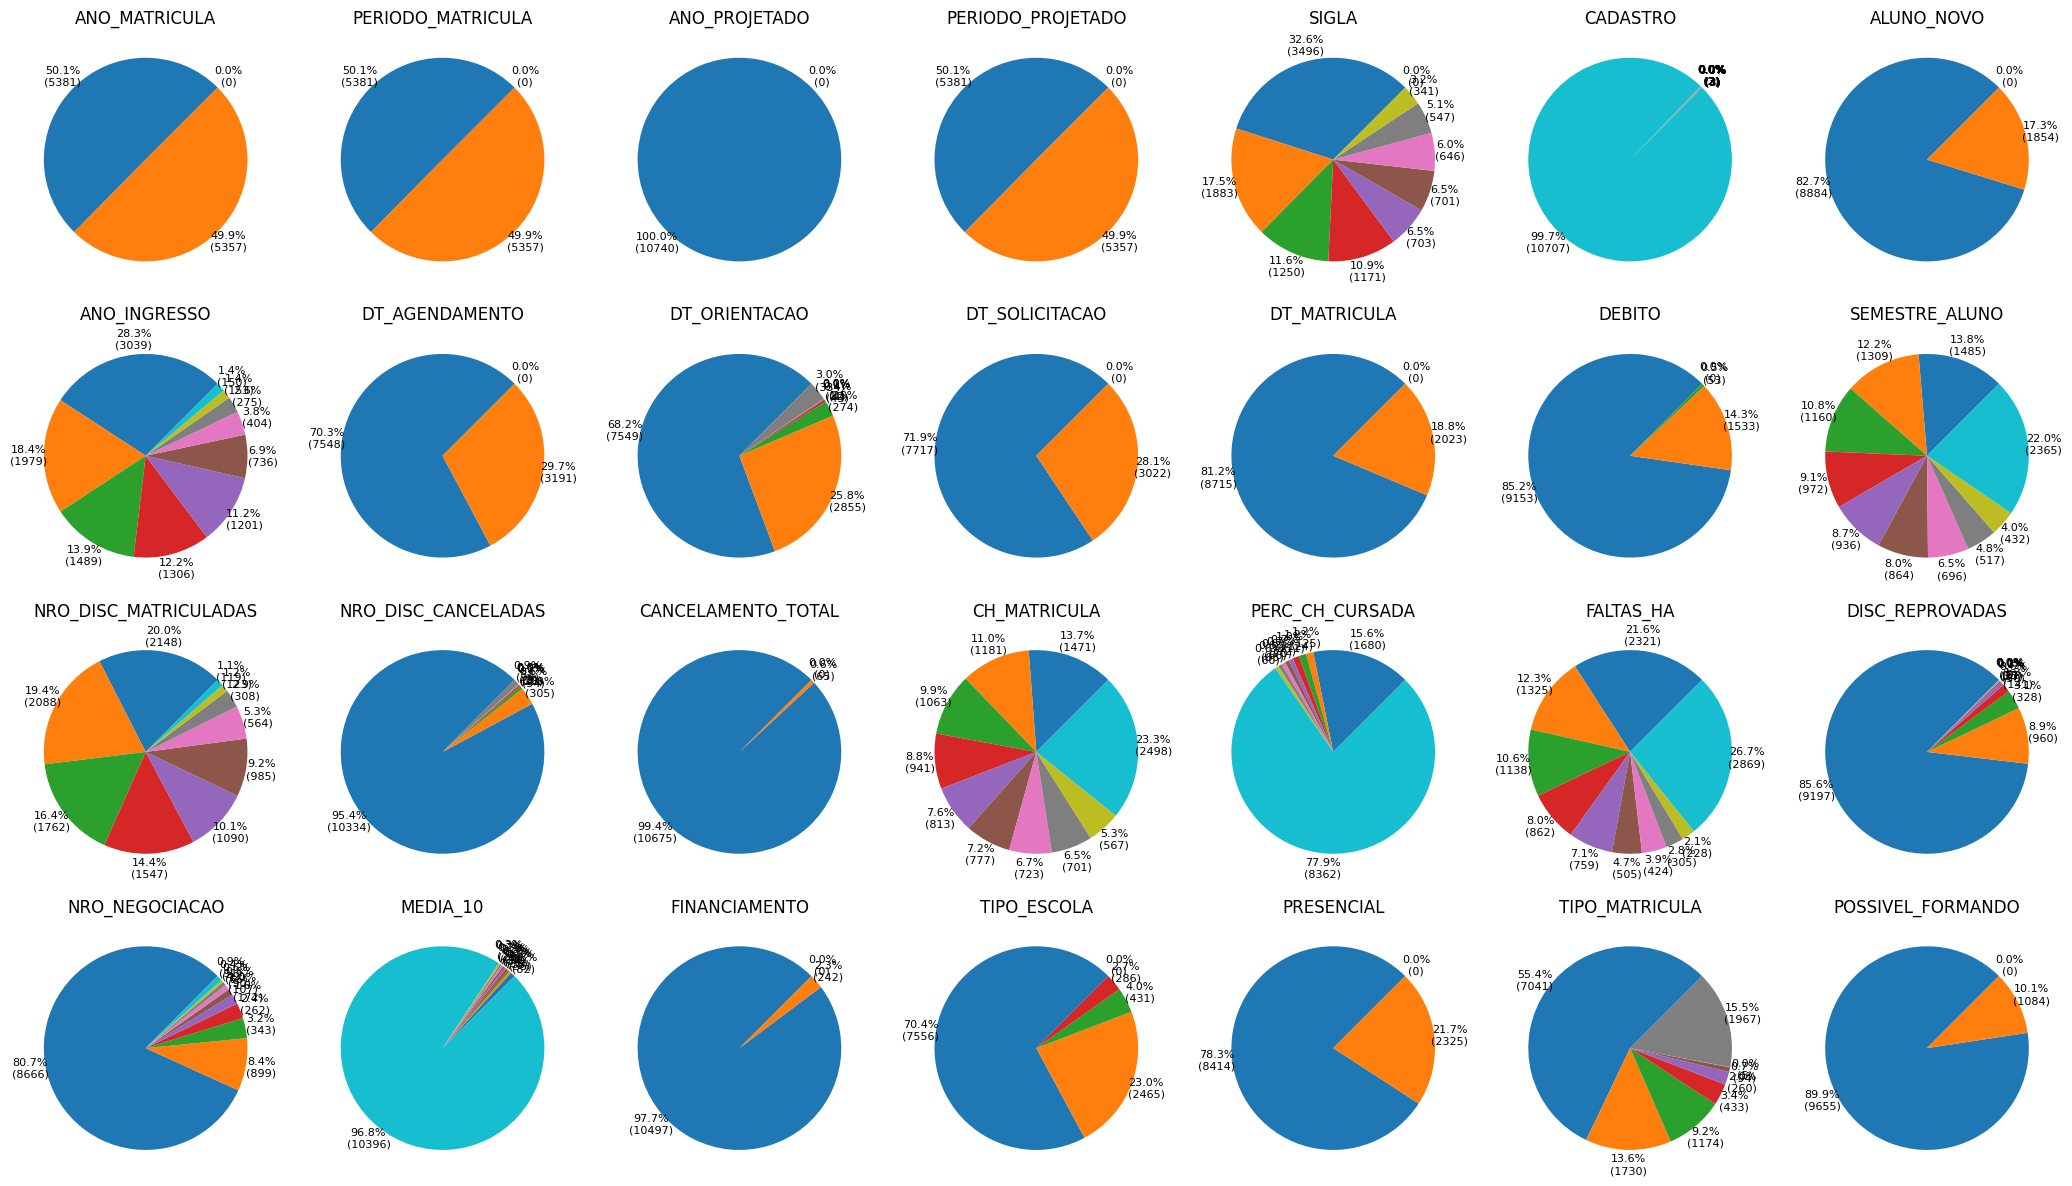

In [ ]:
num_colunas = len(df_copy.columns)
n_cols = 7
n_rows = (num_colunas + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 3, n_rows * 3))
axes = axes.flatten()

for i, coluna in enumerate(df_copy.columns):
    if df_copy[coluna].dtype == 'object' or pd.api.types.is_numeric_dtype(df_copy[coluna]):
        valores_unicos = df_copy[coluna].value_counts()
        top_9 = valores_unicos.head(9)
        outros = valores_unicos.tail(len(valores_unicos) - 9).sum()

        top_9 = pd.concat([top_9, pd.Series({'Outros': outros})])

        def func(pct, allvalues):
            absolute = int(pct / 100. * sum(allvalues))
            return f"{pct:.1f}%\n({absolute})"

        wedges, texts, autotexts = axes[i].pie(
            top_9,
            labels=top_9.index,
            autopct=lambda pct: func(pct, top_9),
            startangle=45,
            pctdistance=1.15,
            labeldistance=2
        )

        for text in texts:
            text.set_visible(False)

        for text in texts:
            text.set_fontsize(8)
        for autotext in autotexts:
            autotext.set_fontsize(8)

        axes[i].set_title(coluna)

    else:
        axes[i].axis('off')

plt.subplots_adjust(wspace=0.3, hspace=0.65)
plt.tight_layout()
plt.show()

### Tratamento e limpeza dos dados

In [ ]:
# Remoção de colunas não relevantes
drop_columns = [
    "ANO_MATRICULA",
    "ANO_PROJETADO",
    "PERIODO_MATRICULA",
    "PERIODO_PROJETADO",
    "CADASTRO",
    "ANO_INGRESSO"
]
df = df.drop(columns=drop_columns)

In [ ]:
df.head()

,SIGLA,ALUNO_NOVO,DT_AGENDAMENTO,DT_ORIENTACAO,DT_SOLICITACAO,DT_MATRICULA,DEBITO,SEMESTRE_ALUNO,NRO_DISC_MATRICULADAS,NRO_DISC_CANCELADAS,...,PERC_CH_CURSADA,FALTAS_HA,DISC_REPROVADAS,NRO_NEGOCIACAO,MEDIA_10,FINANCIAMENTO,TIPO_ESCOLA,PRESENCIAL,TIPO_MATRICULA,POSSIVEL_FORMANDO
0,CURSO_1,0,0,0,1,1,0,5,3,0,...,"28,89",29,0,0,"5,55625",0,NaN,0,matricula-parcelamento-por-disciplina,0
1,CURSO_1,0,0,0,1,1,0,6,3,0,...,"95,56",22,0,0,"6,1375",0,Pública Regular,0,matricula-parcelamento-por-disciplina,0
2,CURSO_1,1,1,1,1,1,1,3,4,0,...,"54,44",16,0,0,"6,37333",0,Pública Regular,1,matricula-parcelamento-por-disciplina,0
3,CURSO_1,0,0,0,0,0,0,15,1,0,...,100,0,0,2,"5,58409",0,Pública Regular,0,credito,1
4,CURSO_1,0,1,1,1,1,0,4,3,0,...,"48,89",4,0,0,"4,56551",0,Pública Regular,1,matricula-parcelamento-por-disciplina,0


In [ ]:
# Conversão do tipo das colunas PERC_CH_CURSADA e PERC_CH_CURSADA para numérico
df['PERC_CH_CURSADA'] = pd.to_numeric(df['PERC_CH_CURSADA'].str.replace(',', '.'), errors='coerce')
df["MEDIA_10"] = pd.to_numeric(df["MEDIA_10"].str.replace(',', '.'), errors='coerce')

In [ ]:
# Imputer - Preenchimento de valores nulos

# Preenchimento de valores nulos com média das notas - MEDIA_10
imputer = SimpleImputer(strategy="mean")
df["MEDIA_10"] = imputer.fit_transform(df[["MEDIA_10"]])

# Preenchimento do tipo de escola com a moda - TIPO_ESCOLA
imputer = SimpleImputer(strategy='most_frequent')
df["TIPO_ESCOLA"] = imputer.fit_transform(df[["TIPO_ESCOLA"]]).ravel()

In [ ]:
# Normalização - MinMaxScaler e StandardScaler

# Normalização das features que possuem um intervalo definido com MinMaxScaler
#   PERC_CH_CURSADA - 0 a 100%
#   MEDIA_10 - 0 a 10
columns_minmax = [
    "PERC_CH_CURSADA",
    "MEDIA_10"
]
minmax_scaler = MinMaxScaler()
df_minmax = pd.DataFrame(minmax_scaler.fit_transform(df[columns_minmax]), columns=columns_minmax)

# Normalização das variáveis que não possuem intervalo fixo com StandardScaler
columns_standard = [
    "DEBITO",
    "SEMESTRE_ALUNO",
    "NRO_DISC_MATRICULADAS",
    "NRO_DISC_CANCELADAS",
    "CH_MATRICULA",
    "FALTAS_HA",
    "DISC_REPROVADAS",
    "NRO_NEGOCIACAO"
]
standard_scaler = StandardScaler()
df_standard = pd.DataFrame(standard_scaler.fit_transform(df[columns_standard]), columns=columns_standard)

df = pd.concat([df.drop(columns=columns_minmax+columns_standard), df_standard, df_minmax], axis=1)

In [ ]:
# Criação da coluna 'PAGAMENTO_FIXO' para representar 'TIPO_MATRICULA' de forma binária,
# ao invés de categórica. Para isso, é feito um agrupamento do tipo da matricula de
# acordo com as similaridades de cada tipo de matricula
# PAGAMENTO_FIXO = 1
#   matricula-parcelamento-fixo, matricula-parcelamento-fixo-personalizado, mensalidade-fixa
# PAGAMENTO_FIXO = 0 (Pagamento variável)
#   matricula-parcelamento-por-disciplina, credito, matricula-dias-aula-personalizado, matricula-dias-aula
df['PAGAMENTO_FIXO'] = df['TIPO_MATRICULA'].isin([
    'matricula-parcelamento-fixo',
    'matricula-parcelamento-fixo-personalizado',
    'mensalidade-fixa'
]).astype(int)

# Criação das colunas 'ESCOLA_PARTICULAR_REGULAR' e 'ESCOLA_SUPLETIVO' para representar
# de forma binária 'TIPO_ESCOLA'
# ESCOLA_PARTICULAR_REGULAR
#   Particular Regular = 1
#   Outros valores     = 0
# ESCOLA_SUPLETIVO
#   Pública Supletivo, Particular Supletivo = 1
#   Outros valores                          = 0
df['ESCOLA_PARTICULAR_REGULAR'] = df['TIPO_ESCOLA'].isin(['Particular Regular']).astype(int)
df['ESCOLA_SUPLETIVO'] = df['TIPO_ESCOLA'].isin(['Pública Supletivo', 'Particular Supletivo']).astype(int)

df.drop(columns=['TIPO_MATRICULA', 'TIPO_ESCOLA'], inplace=True)

In [ ]:
# OneHotEncoder
# Conversão da variável categórica 'SIGLA' em colunas com valores binários utilizando
# o método OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)
columns_encoded = ['SIGLA']
df_encoded = encoder.fit_transform(df[columns_encoded])

df_encoded = pd.DataFrame(df_encoded, columns=encoder.get_feature_names_out(columns_encoded))
df = pd.concat([df.drop(columns=columns_encoded), df_encoded], axis=1)

### Análise das features / target

In [ ]:
# Correlação de Pearson
# Visualização da correlação de todas 'features' em relação ao 'target'
correlation = df.corr(method='pearson')['CANCELAMENTO_TOTAL'].sort_values(ascending=False)
print(f"Correlação de Pearson: \n{correlation}")

Correlação de Pearson: 
CANCELAMENTO_TOTAL           1.000000
NRO_DISC_CANCELADAS          0.546223
DISC_REPROVADAS              0.027824
DT_SOLICITACAO               0.015253
ESCOLA_SUPLETIVO             0.014331
DEBITO                       0.012393
SIGLA_CURSO_2                0.011271
SIGLA_CURSO_1                0.010869
ALUNO_NOVO                   0.004286
SIGLA_CURSO_8                0.000034
SIGLA_CURSO_9               -0.000155
SIGLA_CURSO_5               -0.002287
NRO_NEGOCIACAO              -0.004313
SIGLA_CURSO_6               -0.004475
SIGLA_CURSO_3               -0.004486
SIGLA_CURSO_4               -0.006445
SIGLA_CURSO_7               -0.006934
SEMESTRE_ALUNO              -0.011028
ESCOLA_PARTICULAR_REGULAR   -0.011509
FINANCIAMENTO               -0.013584
FALTAS_HA                   -0.022280
POSSIVEL_FORMANDO           -0.028818
PAGAMENTO_FIXO              -0.034687
MEDIA_10                    -0.035746
PRESENCIAL                  -0.041071
DT_ORIENTACAO             

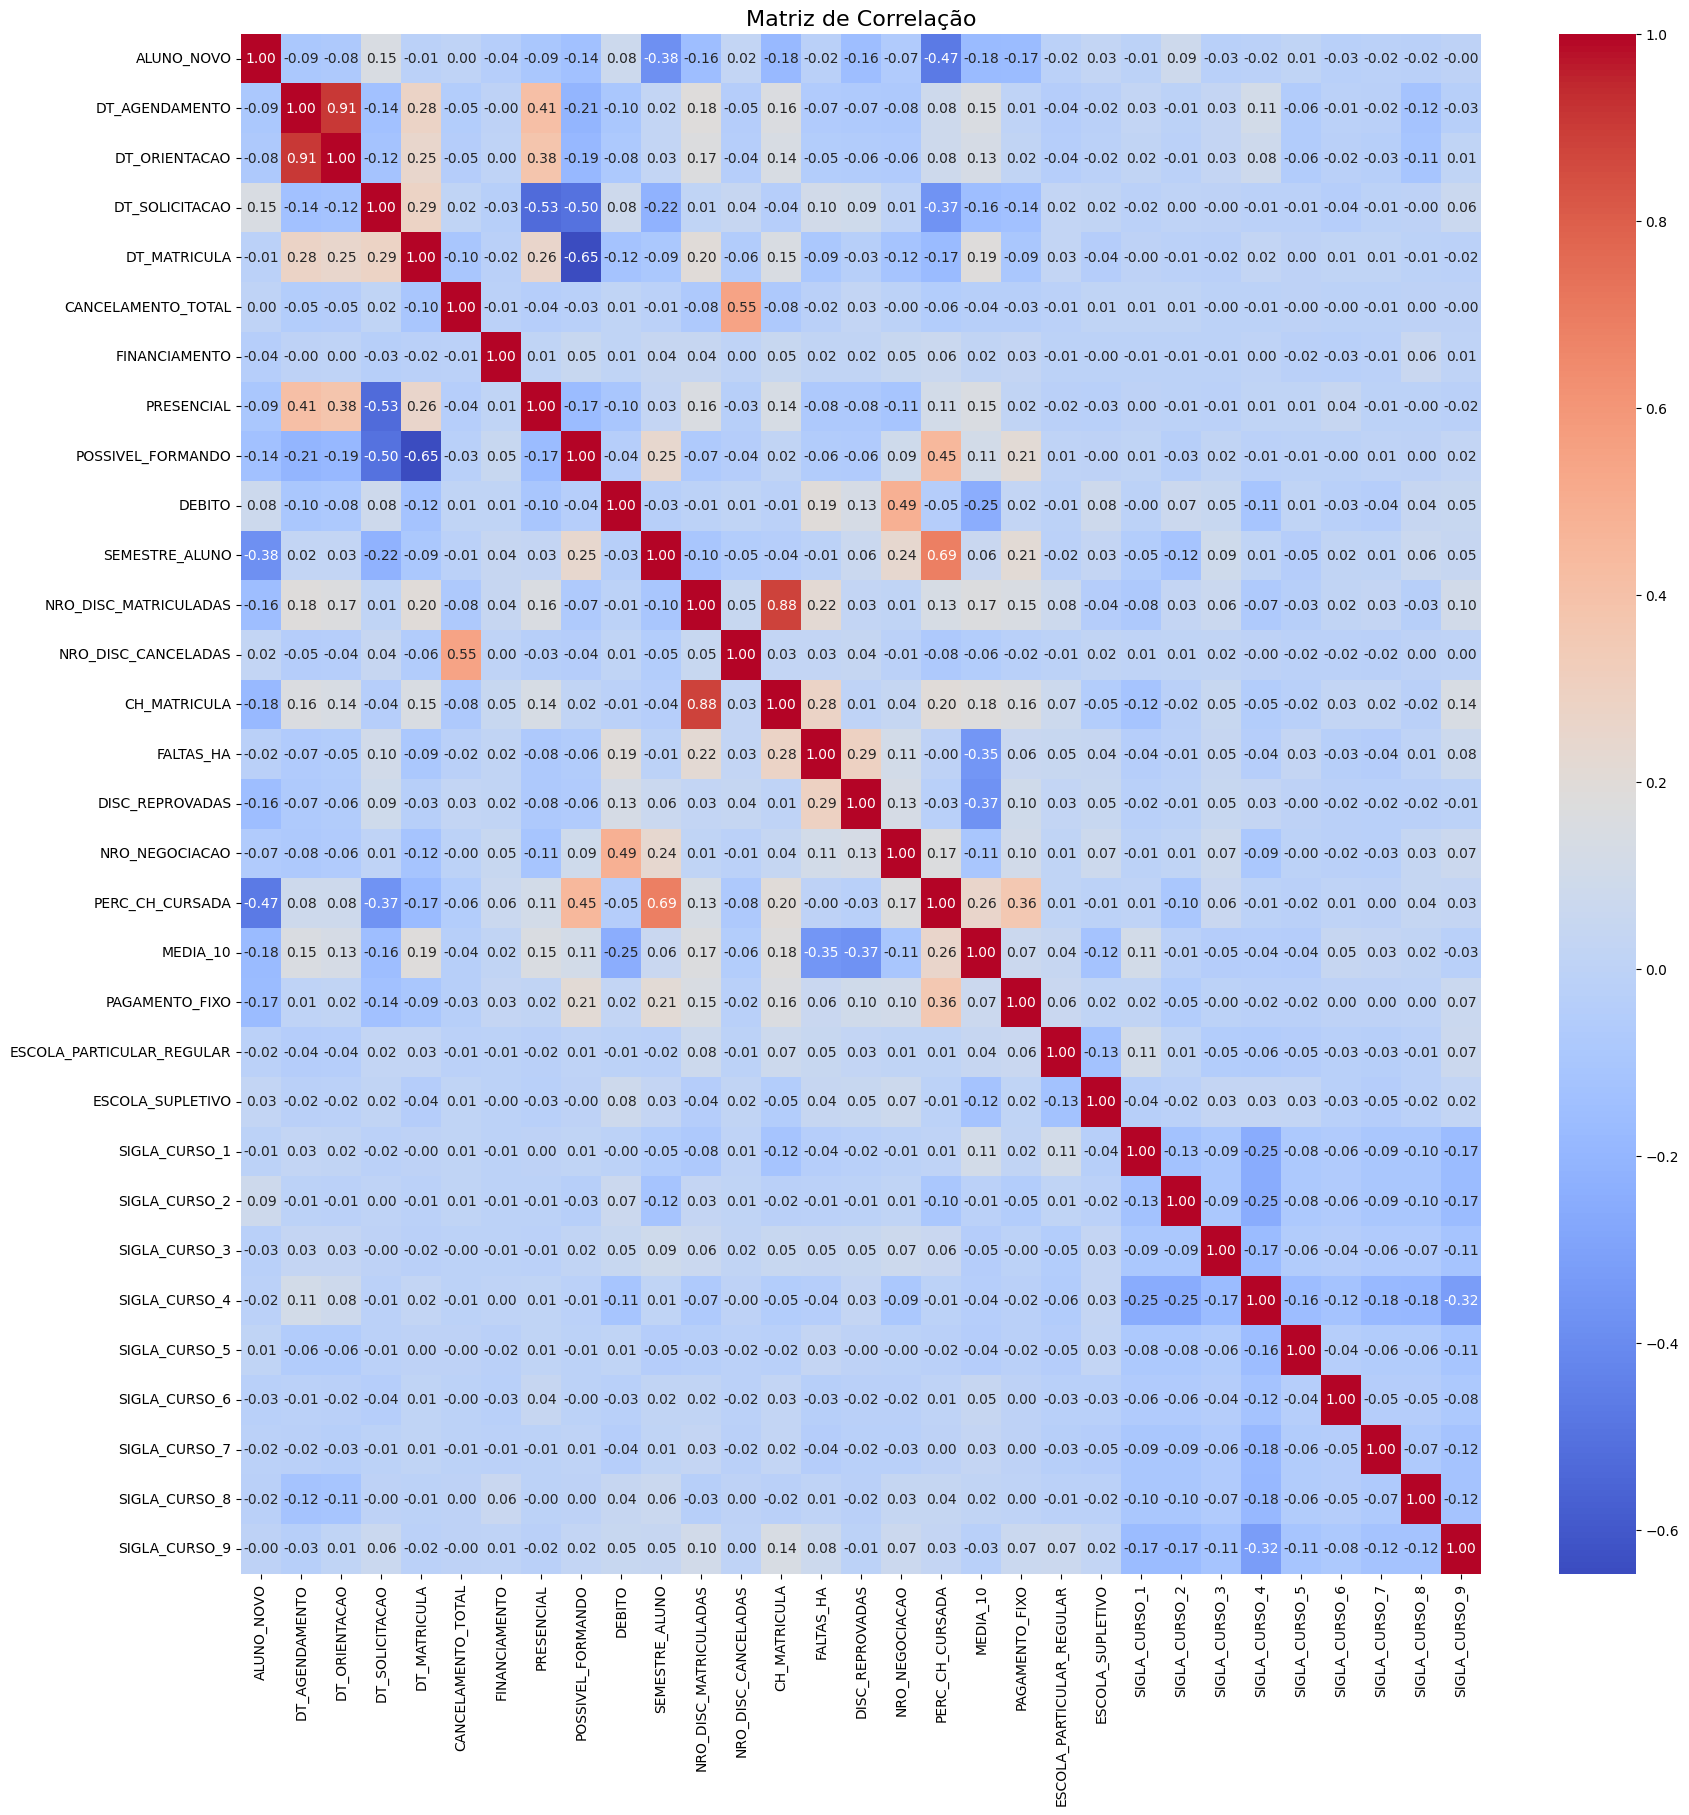

In [ ]:
# Correlação de Pearson
# Visualização da correlação entre todas 'features'
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(method='pearson'), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação', fontsize=16)
plt.show()

In [ ]:
# Variáveis com alta correlação entre si
#   DT_ORIENTACAO e DT_AGENDAMENTO - Manter DT_AGENDAMENTO
#   PERC_CH_CURSADA e SEMESTRE_ALUNO e ALUNO_NOVO - Manter SEMESTRE_ALUNO
#   DEBITO e NRO_NEGOCIACAO - Manter DEBITO

# Variáveis com baixa correlação com a variável target (CANCELAMENTO_TOTAL)
#   SIGLA_CURSO_*

df.drop(columns=["ALUNO_NOVO", "PERC_CH_CURSADA", "NRO_NEGOCIACAO", "DT_ORIENTACAO"], inplace=True)
df = df.loc[:, ~df.columns.str.startswith('SIGLA_CURSO_')]

In [ ]:
df.head()

,DT_AGENDAMENTO,DT_SOLICITACAO,DT_MATRICULA,CANCELAMENTO_TOTAL,FINANCIAMENTO,PRESENCIAL,POSSIVEL_FORMANDO,DEBITO,SEMESTRE_ALUNO,NRO_DISC_MATRICULADAS,NRO_DISC_CANCELADAS,CH_MATRICULA,FALTAS_HA,DISC_REPROVADAS,MEDIA_10,PAGAMENTO_FIXO,ESCOLA_PARTICULAR_REGULAR,ESCOLA_SUPLETIVO
0,0,1,1,0,0,0,0,-0.417535,-0.425334,-0.495107,-0.171979,-0.522486,0.450969,-0.331861,0.555625,0,0,0
1,0,1,1,0,0,0,0,-0.417535,-0.207954,-0.495107,-0.171979,-0.216424,0.175026,-0.331861,0.613750,0,0,0
2,1,1,1,0,0,1,0,2.230067,-0.860094,0.004571,-0.171979,0.395701,-0.061496,-0.331861,0.637333,0,0,0
3,0,0,0,0,0,0,1,-0.417535,1.748468,-1.494461,-0.171979,-1.593705,-0.692222,-0.331861,0.558409,0,0,0
4,1,1,1,0,0,1,0,-0.417535,-0.642714,-0.495107,-0.171979,-0.522486,-0.534541,-0.331861,0.456551,0,0,0


### Treinamento e avaliação de modelos

In [ ]:
X = df.drop(columns=["CANCELAMENTO_TOTAL"])
y = df["CANCELAMENTO_TOTAL"]

# Método de Avaliação - Hold Out
# Divisão entre dados de treino (70%) e teste (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Balanceamento dos dados - SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

print(f"Tamanho original do conjunto de treino: {X_train.shape}")
print(f"Tamanho balanceado do conjunto de treino: {X_train_balanced.shape}\n")
print("Distribuição após balanceamento:")
print(y_train_balanced.value_counts())

Tamanho original do conjunto de treino: (8264, 17)
Tamanho balanceado do conjunto de treino: (16402, 17)

Distribuição após balanceamento:
CANCELAMENTO_TOTAL
0    8201
1    8201
Name: count, dtype: int64


In [ ]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier()
}

# Medidas de desempenho
#   Classification Report - precision, recall, f1-score, support, ...
#   Confusion Matrix
#   AUC
for name, model in models.items():
    model.fit(X_train_balanced, y_train_balanced)

    y_pred = model.predict(X_test)

    print(f"Modelo: {name}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    print("Matriz de confusão:")
    print(confusion_matrix(y_test, y_pred))

    y_probs = model.predict_proba(X_test)[:, 1]
    auc = roc_auc_score(y_test, y_probs)
    print(f"AUC: {auc:.4f}")
    print("\n" + "="*55 + "\n")

Modelo: Logistic Regression
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3516
           1       0.79      1.00      0.89        27

    accuracy                           1.00      3543
   macro avg       0.90      1.00      0.94      3543
weighted avg       1.00      1.00      1.00      3543

Matriz de confusão:
[[3509    7]
 [   0   27]]
AUC: 0.9997


Modelo: Random Forest
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3516
           1       0.96      0.89      0.92        27

    accuracy                           1.00      3543
   macro avg       0.98      0.94      0.96      3543
weighted avg       1.00      1.00      1.00      3543

Matriz de confusão:
[[3515    1]
 [   3   24]]
AUC: 0.9996


Modelo: Gradient Boosting
Classification Report:
              precision    recall  f1-score   support

           0       1.00 

#### Comparação de Modelos

## **1. Análise das Métricas por Classe**
### **Classe 1 (minoritária e mais difícil de prever)**
- **Precision**:
  - Logistic Regression: **0.79**
  - Random Forest: **0.96**
  - Gradient Boosting: **0.87**
  - *Interpretação*: O Random Forest tem a melhor precisão, mas o Gradient Boosting mantém um bom equilíbrio.

- **Recall**:
  - Logistic Regression: **1.00**
  - Random Forest: **0.81**
  - Gradient Boosting: **0.96**
  - *Interpretação*: O Gradient Boosting se destaca com o melhor recall, indicando que identifica corretamente 96% das instâncias da classe 1.

### **Classe 0**
Todos os modelos apresentam desempenho quase perfeito, com **precision**, **recall** e **F1-score** de **1.00** ou muito próximos.

---

## **2. Métricas Globais**
- **AUC (Área sob a curva ROC)**:
  - Logistic Regression: **0.9997**
  - Random Forest: **0.9996**
  - Gradient Boosting: **0.9999**
  - *Interpretação*: O Gradient Boosting tem a maior AUC, indicando melhor capacidade de discriminação entre as classes.

- **Macro Avg e Weighted Avg**:
  - O Gradient Boosting apresenta a melhor **macro avg** para recall (**0.98**) e F1-score (**0.96**), destacando um desempenho equilibrado entre as classes.

---

## **3. Matriz de Confusão**
- **Logistic Regression**:
  - Falsos positivos (classe 0): **7**
  - Falsos negativos (classe 1): **0**
- **Random Forest**:
  - Falsos positivos (classe 0): **1**
  - Falsos negativos (classe 1): **5**
- **Gradient Boosting**:
  - Falsos positivos (classe 0): **4**
  - Falsos negativos (classe 1): **1**

*Interpretação*: O Gradient Boosting tem menos falsos negativos que o Random Forest e menos falsos positivos que o Logistic Regression.

---

## **Conclusão**

O **Gradient Boosting** destaca-se como o modelo mais adequado pelos seguintes motivos:

1. **Equilíbrio superior entre precisão e recall**: Apresenta excelente desempenho na identificação da classe minoritária (classe 1), reduzindo erros sem comprometer a precisão.
2. **Maior AUC**: Com um valor de **0.9999**, demonstra a melhor capacidade de discriminação entre as classes, mesmo em cenários desbalanceados.
3. **Menor taxa de erros críticos**: Gera apenas 1 falso negativo, significativamente melhor que o Random Forest, e reduz falsos positivos em comparação ao Logistic Regression.

Dado que a prioridade é minimizar falsos negativos para a classe minoritária, o modelo **Gradient Boosting** é a escolha mais apropriada para este problema, equilibrando eficácia e confiabilidade.
